In [253]:
%pylab inline
e = 1.602e-19 #electronic charge
h = 6.63e-34 #Planck's constant
e0 = 8.85e-12 #Permittivity of free space
m0 = 9.11e-31 #Free electron mass

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [254]:
import os
import sys
import csv
scripts_path = os.path.abspath(os.path.join('../scripts/'))
data_path = os.path.abspath(os.path.join('../data/'))
sys.path.append(scripts_path)
sys.path.append(data_path)
    

In [255]:
scripts_path

'/home/treharne/Documents/projects/SAZO/scripts'

In [256]:
T_data = data_path + '/T/160609_A_extract_d.txt'
R_data = data_path + '/4PP/160609_A.dat'

In [257]:
def read_T_data(path):
    f = open (path, 'rb')
    reader = csv.reader(f)
    data = []
    data_dict = {}
    x, y = relabel_T_coords()
    coords = np.transpose([x,y])
   
    for i, line in zip(coords, reader):
        item = [float(x) for x in line[0].split(' ')]
        
        data_dict['%s %s' % (i[0], i[1])] = {'x': i[0], 
                                             'y': i[1],
                                             'd': item[2],
                                             'wp': item[3]}
                                            
    return data_dict


In [258]:
def read_R_data(path):
    f = open(path, 'rb')
    reader = csv.reader(f)
    headers = reader.next()
    data = []
    data_dict = {}
    x, y = relabel_T_coords()
    coords = np.transpose([x,y])
    for i, line in zip(coords, reader):
        print line[0], line[1], line[2]
        
        
        item = []
        for x in line:
            try:
                item.append(float(x))
                
        
            except:
                item.append(None)
                
        if item[2]:
            item[2] = item[2]*4.532
        
        data_dict['%s %s' % (line[0], line[1])] = {'x': line[0], 
                                                   'y': line[1],
                                                   'Rs': item[2]}
    return data_dict
                                             
        

In [259]:
def relabel_T_coords():
    x = []
    y = []
    for i in range(0, 10):
        if i % 2 == 0:
            for j in range(0, 10):
                x.append((j-4.5)*10)
                y.append((4.5-i)*10)
        else:
            for j in range(0, 10):
                x.append((4.5 - j)*10)
                y.append((4.5-i)*10)
    
    return x, y

In [260]:
extracted_T = read_T_data(T_data)
extracted_R = read_R_data(R_data)

-45.0 45.0 12.977162
-35.0 45.0 10.860742
-25.0 45.0 10.329885
-15.0 45.0 12.391163
-5.0 45.0 23.161872
5.0 45.0 71.604015
15.0 45.0 686.196919
25.0 45.0 98981.270649
35.0 45.0 OverRange
45.0 45.0 Error
-45.0 35.0 12.583466
-35.0 35.0 10.328384
-25.0 35.0 9.477157
-15.0 35.0 9.996502
-5.0 35.0 13.852958
5.0 35.0 29.881624
15.0 35.0 103.687133
25.0 35.0 652.716685
35.0 35.0 7139.003184
45.0 35.0 441147.086582
-45.0 25.0 12.861356
-35.0 25.0 9.000800
-25.0 25.0 9.106267
-15.0 25.0 8.792362
-5.0 25.0 9.948018
5.0 25.0 14.054880
15.0 25.0 28.113189
25.0 25.0 76.220290
35.0 25.0 258.219730
45.0 25.0 813.552454
-45.0 15.0 13.601558
-35.0 15.0 10.647306
-25.0 15.0 9.037289
-15.0 15.0 8.243526
-5.0 15.0 8.232529
5.0 15.0 9.205736
15.0 15.0 12.141358
25.0 15.0 19.472211
35.0 15.0 35.792775
45.0 15.0 65.679201
-45.0 5.0 14.592166
-35.0 5.0 11.005198
-25.0 5.0 9.243226
-15.0 5.0 8.146557
-5.0 5.0 7.659203
5.0 5.0 7.614215
15.0 5.0 8.242027
25.0 5.0 9.595621
35.0 5.0 12.360175
45.0 5.0 16.436428
-

In [261]:
def getxyz(data, param):
    count = 0
    x = []
    y = []
    z = []
    for key in data.keys():
        x.append(data.get(key, None).get('x', None))
        y.append(data.get(key, None).get('y', None))
        z.append(data.get(key, None).get(param, None))
    return x, y, z
    
    

In [262]:
def contour_plot(data, param, res=50, scale='linear'):
    x, y, z = getxyz(data, param)
    
    if scale == 'log':
        for i in range (0, len(z)):
            try: 
                z[i] = np.log10(z[i])
            except:
                z[i] = None
    
    xi = np.linspace(min(x), max(x), res)
    yi = np.linspace(min(y), max(y), res)
    zi = griddata(x, y, z, xi, yi)
    
    fig = figure(figsize=(9,7))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')

    S = ax.contour(xi, yi, zi, 10, colors='k')
    CF = ax.contourf(xi, yi, zi, 50, cmap='gist_rainbow')
    ax.clabel(S, fontsize=15, fmt='%1.0f')

    ax.set_xlabel('x (mm)', fontsize=15)
    ax.set_ylabel('y (mm)', fontsize=15)
    ax.tick_params(labelsize=15)

In [263]:
def merge_dict(dict1, dict2):
    dict3 = {}
    for key in dict1.keys():
        d = dict1.get(key).copy()
        d.update(dict2.get(key))
        dict3[key] = d
    return dict3
        
        

In [264]:
merged = merge_dict(extracted_R, extracted_T)

In [265]:
def get_ne(data_dict, mstar = 0.38, varepsilon = 4):
    
    for key in data_dict.keys():
              
        #from wp calculate ne and convert to cm^-3
        #wp currently in units eV
        wpeV = data_dict[key].get('wp')
        wp = (wpeV*e)*2*pi/h
        
        #calculate ne
        
        ne = (wp**2*mstar*m0*e0/e**2)/1e6
        
        #add to original dictionary
        #data_dict[key]['ne'] = ne
        data_dict[key]['ne'] = ne
        
        

In [266]:
def get_rho(data_dict):
    for  key in data_dict.keys():
        Rs = data_dict[key].get('Rs')
        d = data_dict[key].get('d')
        try:
            rho = Rs*(d*1e-7)        
            data_dict[key]['rho'] = rho
        except:
            data_dict[key]['rho'] = None
        
    

In [267]:
get_rho(merged)

In [268]:
merged

{'-15.0 -15.0': {'Rs': 41.885772764,
  'd': 230.0,
  'rho': 0.0009633727735720001,
  'wp': 1.1422117948950627,
  'x': -15.0,
  'y': -15.0},
 '-15.0 -25.0': {'Rs': 51.859984176000005,
  'd': 200.0,
  'rho': 0.00103719968352,
  'wp': 1.2076267039993867,
  'x': -15.0,
  'y': -25.0},
 '-15.0 -35.0': {'Rs': 81.378033176,
  'd': 184.0,
  'rho': 0.0014973558104384001,
  'wp': 1.177450302203987,
  'x': -15.0,
  'y': -35.0},
 '-15.0 -45.0': {'Rs': 186.925838704,
  'd': 167.0,
  'rho': 0.0031216615063567998,
  'wp': 1.1285693230713587,
  'x': -15.0,
  'y': -45.0},
 '-15.0 -5.0': {'Rs': 38.050585892,
  'd': 244.0,
  'rho': 0.0009284342957648,
  'wp': 1.117355982718312,
  'x': -15.0,
  'y': -5.0},
 '-15.0 15.0': {'Rs': 37.359659832,
  'd': 283.0,
  'rho': 0.0010572783732456,
  'wp': 1.0221322977401497,
  'x': -15.0,
  'y': 15.0},
 '-15.0 25.0': {'Rs': 39.846984584000005,
  'd': 309.0,
  'rho': 0.0012312718236456,
  'wp': 0.9557745547017039,
  'x': -15.0,
  'y': 25.0},
 '-15.0 35.0': {'Rs': 45.3041

In [324]:
def get_mob(data_dict):
    for key in data_dict.keys():
        try:
            rho = data_dict[key].get('rho')
            ne = data_dict[key].get('ne')
            mob = 1/(ne*e*rho)
            data_dict[key]['mob'] = mob
        except:
            data_dict[key]['mob'] = None
            
    

In [325]:
get_ne(merged)
get_mob(merged)

In [326]:
merged

{'-15.0 -15.0': {'Rs': 41.885772764,
  'd': 230.0,
  'mob': 18.04978007525077,
  'ne': 3.589807869387316e+20,
  'rho': 0.0009633727735720001,
  'wp': 1.1422117948950627,
  'x': -15.0,
  'y': -15.0},
 '-15.0 -25.0': {'Rs': 51.859984176000005,
  'd': 200.0,
  'mob': 14.997945552474231,
  'ne': 4.012761426017276e+20,
  'rho': 0.00103719968352,
  'wp': 1.2076267039993867,
  'x': -15.0,
  'y': -25.0},
 '-15.0 -35.0': {'Rs': 81.378033176,
  'd': 184.0,
  'mob': 10.928218779571974,
  'ne': 3.8147237672464574e+20,
  'rho': 0.0014973558104384001,
  'wp': 1.177450302203987,
  'x': -15.0,
  'y': -35.0},
 '-15.0 -45.0': {'Rs': 186.925838704,
  'd': 167.0,
  'mob': 5.705809567490337,
  'ne': 3.5045673153164496e+20,
  'rho': 0.0031216615063567998,
  'wp': 1.1285693230713587,
  'x': -15.0,
  'y': -45.0},
 '-15.0 -5.0': {'Rs': 38.050585892,
  'd': 244.0,
  'mob': 19.571552269171825,
  'ne': 3.4352713040453285e+20,
  'rho': 0.0009284342957648,
  'wp': 1.117355982718312,
  'x': -15.0,
  'y': -5.0},
 '-1

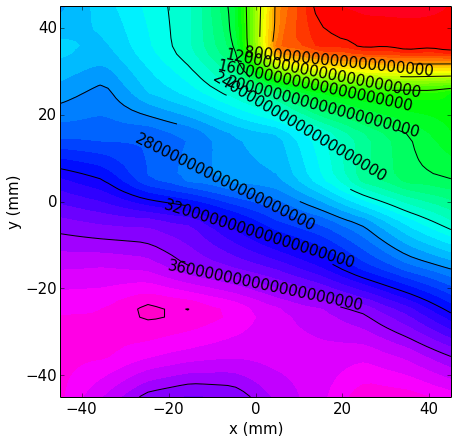

In [341]:
contour_plot(merged, 'ne')

In [328]:
x, y = relabel_T_coords()

In [342]:
def plot_scatter(data_dict):
    ne = []
    mob = []
    d= []
    cond = []
    for key in data_dict.keys():
        try:
            c = 1/data_dict[key].get('rho') 
            cond.append(c)
            
        
            
            ne.append(data_dict[key].get('ne'))
            mob.append(data_dict[key].get('mob'))
            d.append(data_dict[key].get('d'))
            
            
        except:
            next
        
    fig = figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(ne, mob, c=d)
    
    
        
        
    
            

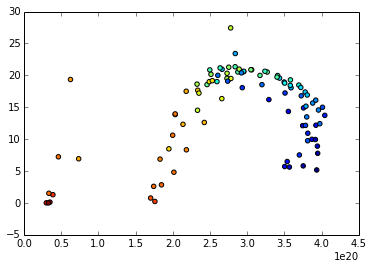

In [343]:
plot_scatter(merged)